In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
jordan = pd.read_csv("jordan_career.csv")
lebron = pd.read_csv("lebron_career.csv")

###
pd.set_option('display.max_rows', jordan.shape[0]+1)
pd.set_option('display.max_rows', lebron.shape[0]+1)
pd.set_option('display.max_columns', jordan.shape[1]+1)
pd.set_option('display.max_columns', lebron.shape[1]+1)
###

jordan.drop(["game", "date", "team", "opp", "minus_plus"], axis=1, inplace=True) 
lebron.drop(["game", "date", "team", "opp", "minus_plus"], axis=1, inplace=True) 

jordan["threep"] = jordan["threep"].fillna(0)
lebron["threep"] = lebron["threep"].fillna(0)

jordan["ftp"] = jordan["ftp"].fillna(0)
lebron["ftp"] = lebron["ftp"].fillna(0)

jordan["result"] = [int(res.split(" ")[1][1:-1]) for res in jordan["result"]]
lebron["result"] = [int(res.split(" ")[1][1:-1]) for res in lebron["result"]]

t_age = lambda a, b: a + b / 365
jordan["age"] = [t_age(*[int(i) for i in age.split("-")]) for age in jordan["age"]]
lebron["age"] = [t_age(*[int(i) for i in age.split("-")]) for age in lebron["age"]]

t_time = lambda a, b: a + b / 60
jordan["mp"] = [t_time(*[int(i) for i in m.split(":")]) for m in jordan["mp"]]
lebron["mp"] = [t_time(*[int(i) for i in m.split(":")]) for m in lebron["mp"]]

In [6]:
jordan

age  result     mp  fg  fga   fgp  three  threeatt  threep  ft  fta  \
0    21.690      16 40.000   5   16 0.313      0         0   0.000   6    7   
1    21.693      -2 34.000   8   13 0.615      0         0   0.000   5    5   
2    21.699       6 34.000  13   24 0.542      0         0   0.000  11   13   
3    21.701       5 36.000   8   21 0.381      0         0   0.000   9    9   
4    21.707     -16 33.000   7   15 0.467      0         0   0.000   3    4   
5    21.723       4 27.000   9   19 0.474      0         0   0.000   7    9   
6    21.726      15 33.000  15   22 0.682      0         0   0.000   3    4   
7    21.732       2 42.000   9   22 0.409      0         0   0.000   9   12   
8    21.740       3 43.000  18   27 0.667      1         1   1.000   8   11   
9    21.745     -20 33.000  12   24 0.500      0         1   0.000   3    3   
10   21.751      -9 44.000   4   17 0.235      0         0   0.000   8    8   
11   21.756     -17 39.000  11   26 0.423      0         3   0.000  12   16   
12   21.762     -10 42.000  11   22 0.500      0         0   0.000  13   14   
13   21.767      19 30.000   9   13 0.692      0         0   0.000   5    6   
14   21.770     -10 41.000  10   24 0.417      0         1   0.000  10   10   
15   21.778      -6 24.000   6   10 0.600      0         0   0.000   1    1   
16   21.784      -5 30.000   9   17 0.529      1         1   1.000   3    4   
17   21.786       4 37.000   9   15 0.600      0         0   0.000   2    4   
18   21.792       1 42.000   7   13 0.538      0         0   0.000   6    8   
19   21.797      15 35.000   7   13 0.538      0         0   0.000   6    6   
20   21.805       2 43.000   8   16 0.500      0         1   0.000   5    7   
21   21.808       2 35.000  10   23 0.435      0         0   0.000   0    0   
22   21.816      -7 37.000  13   28 0.464      0         1   0.000   1    3   
23   21.819      -7 30.000   6   17 0.353      0         2   0.000   9   10   
24   21.825      -2 44.000  12   25 0.480      0         0   0.000  10   10   
25   21.827     -12 27.000   7   16 0.438      0         0   0.000   0    0   
26   21.836      -8 45.000   8   20 0.400      0         1   0.000   2    4   
27   21.841       3 41.000  12   22 0.545      0         0   0.000  10   16   
28   21.847      25 35.000  12   18 0.667      0         0   0.000   8    8   
29   21.860       4 44.000  20   33 0.606      0         1   0.000   5    5   
30   21.866      -3 39.000   7   18 0.389      0         0   0.000   7    9   
31   21.877     -14 34.000  10   14 0.714      0         0   0.000   5    6   
32   21.882       5 38.000   9   16 0.563      0         1   0.000   4    5   
33   21.885      -6 42.000  16   25 0.640      0         0   0.000  10   11   
34   21.896      -3 42.000  12   24 0.500      0         0   0.000  12   13   
35   21.901      16 30.000   8   14 0.571      0         0   0.000   7    7   
36   21.904      -3 36.000  10   21 0.476      0         1   0.000   4    6   
37   21.910       9 43.000  11   16 0.688      0         0   0.000  13   15   
38   21.915      -6 44.000   8   17 0.471      0         1   0.000  11   12   
39   21.918       5 40.000   8   20 0.400      0         0   0.000   9   12   
40   21.923      -3 41.000  15   27 0.556      2         4   0.500   6    8   
41   21.932       8 39.000  11   20 0.550      0         1   0.000   7    7   
42   21.940      17 37.000   6   15 0.400      0         1   0.000  10   10   
43   21.942      13 43.000  17   24 0.708      0         0   0.000  11   11   
44   21.951       6 38.000  11   17 0.647      0         0   0.000   4    6   
45   21.953     -11 41.000  12   19 0.632      0         0   0.000  14   15   
46   21.959     -11 37.000   9   16 0.563      0         2   0.000  13   14   
47   21.970      -4 45.000  14   25 0.560      0         1   0.000  13   14   
48   21.975      -9 38.000   8   17 0.471      0         0   0.000   7    8   
49   21.989      13 45.000  19   31 0.613      0         0

<IPython.core.display.Javascript object>


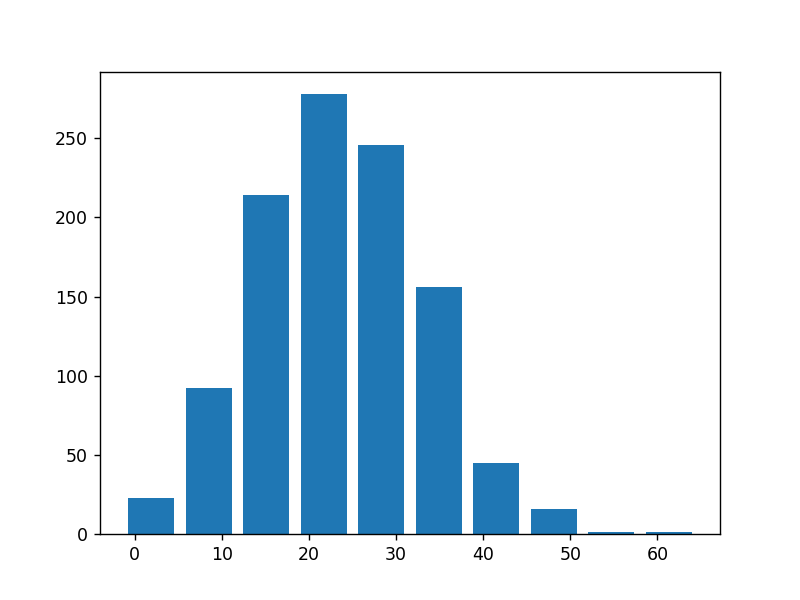

In [9]:
plt.figure()
obj = jordan["game_score"]
hist = plt.hist(obj, range=[np.min(obj), np.max(obj)], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


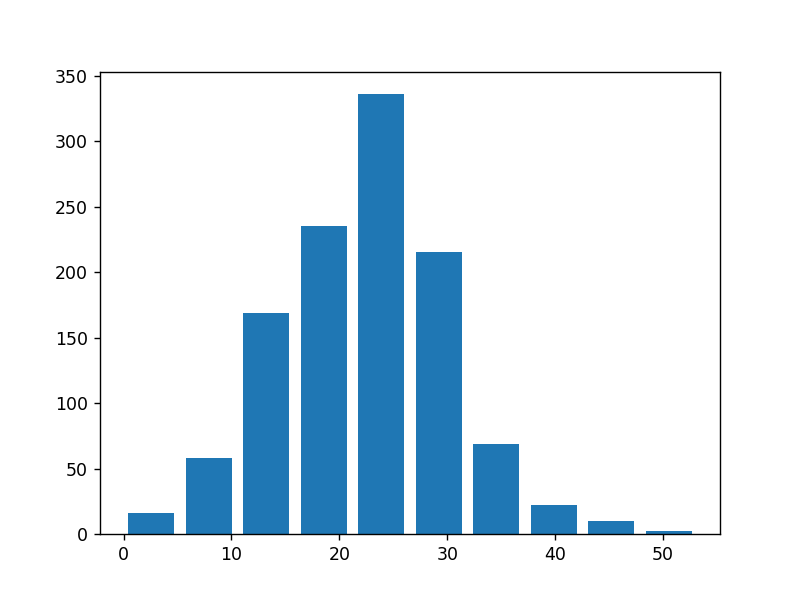

In [10]:
plt.figure()
obj = lebron["game_score"]
hist = plt.hist(obj, range=[np.min(obj), np.max(obj)], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


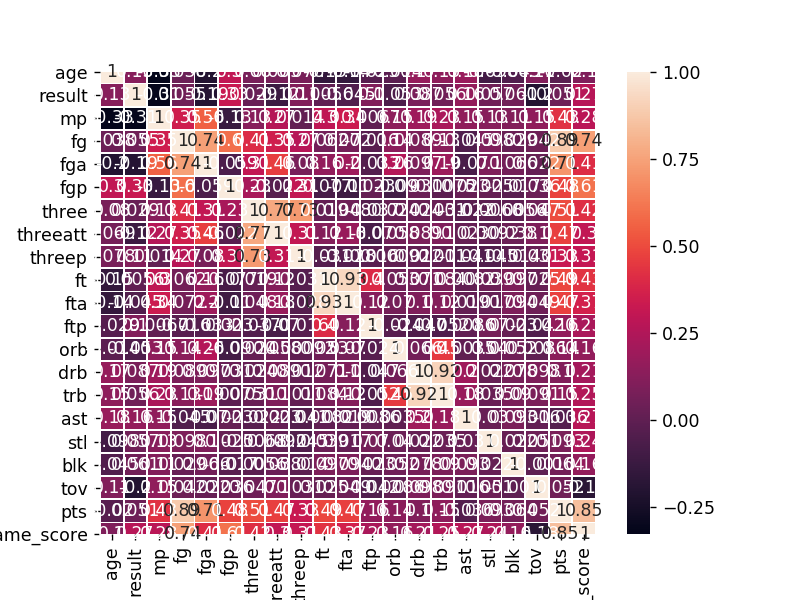

In [11]:
correlacio = lebron.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


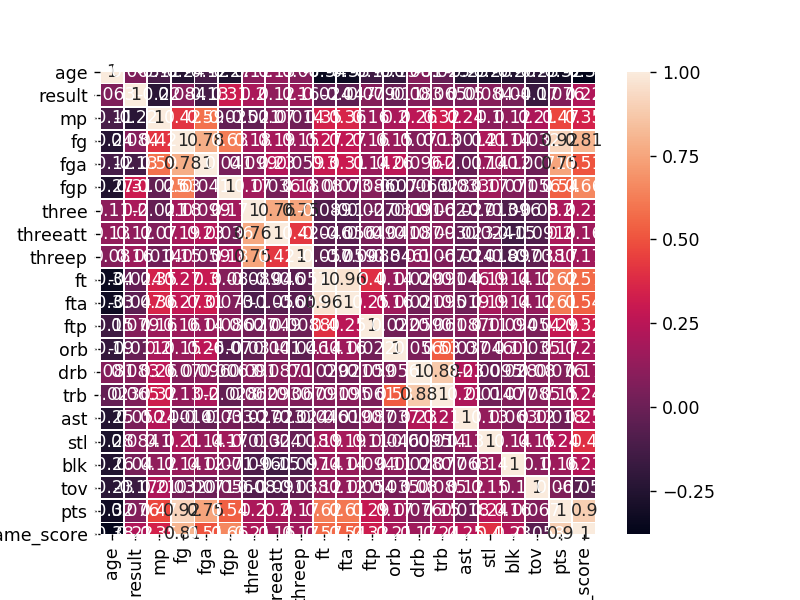

In [12]:
correlacio = jordan.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


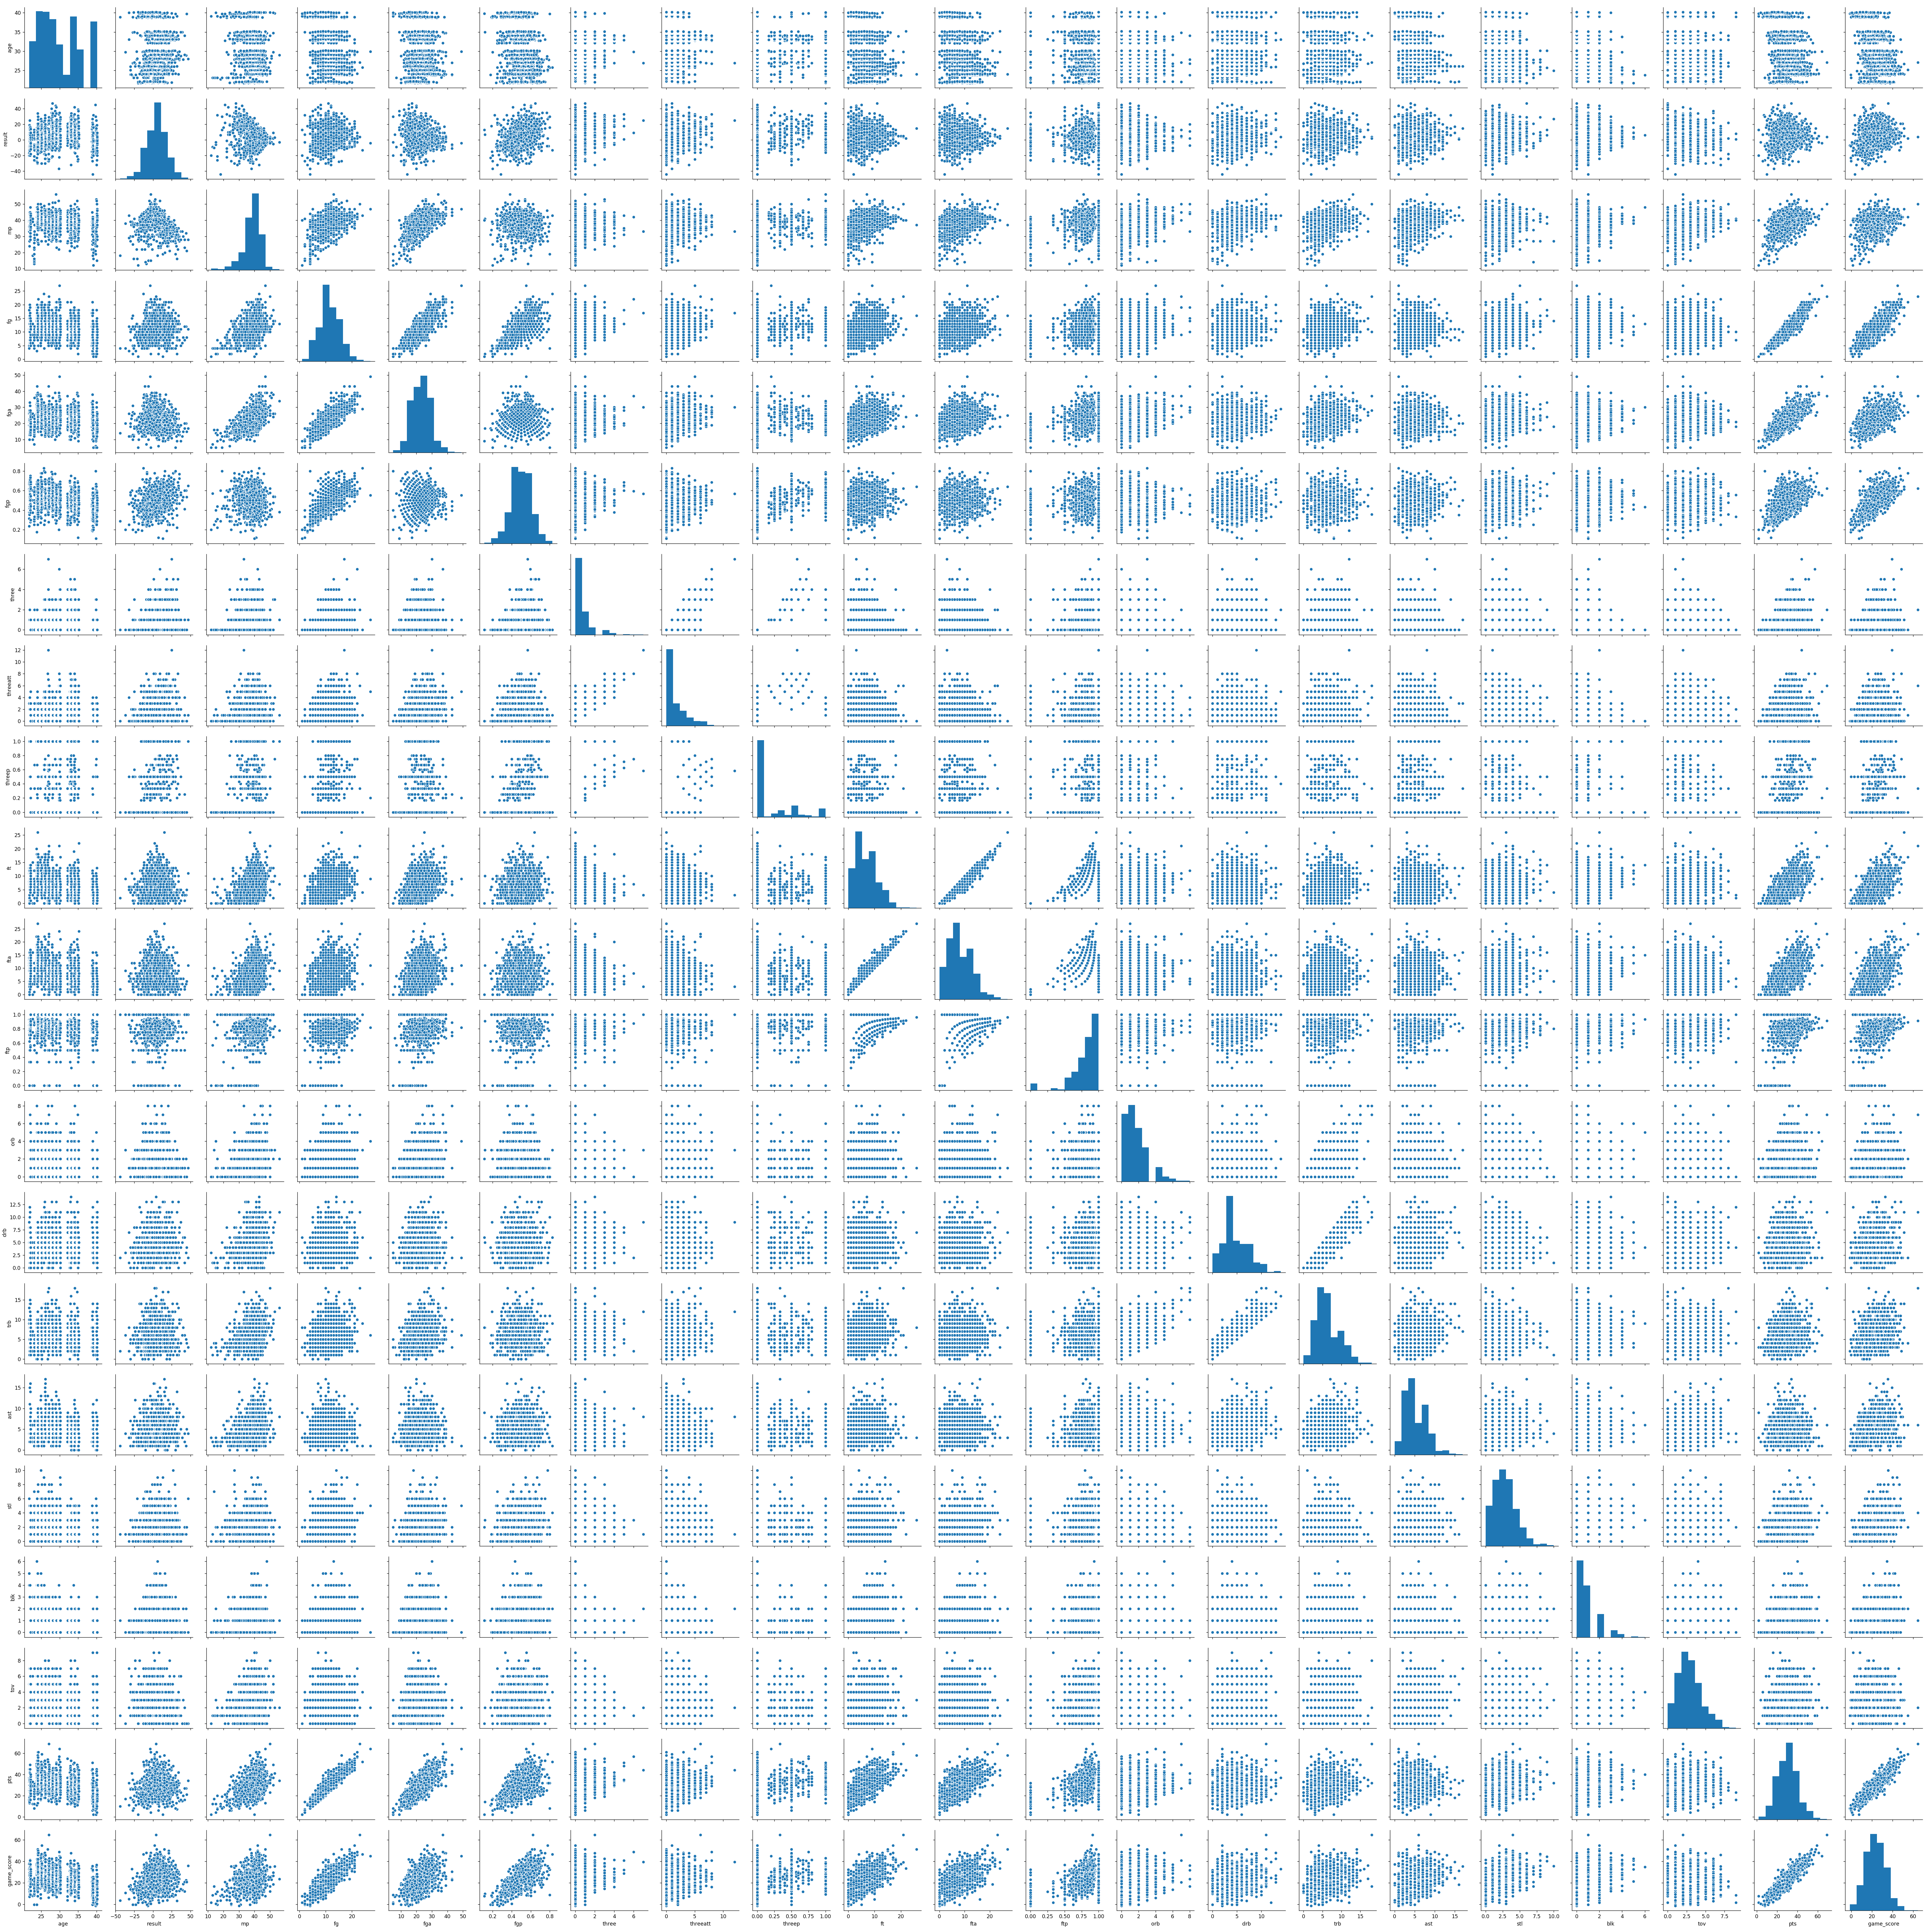

In [15]:
relacio = sns.pairplot(jordan)

C:\Users\fdezm\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


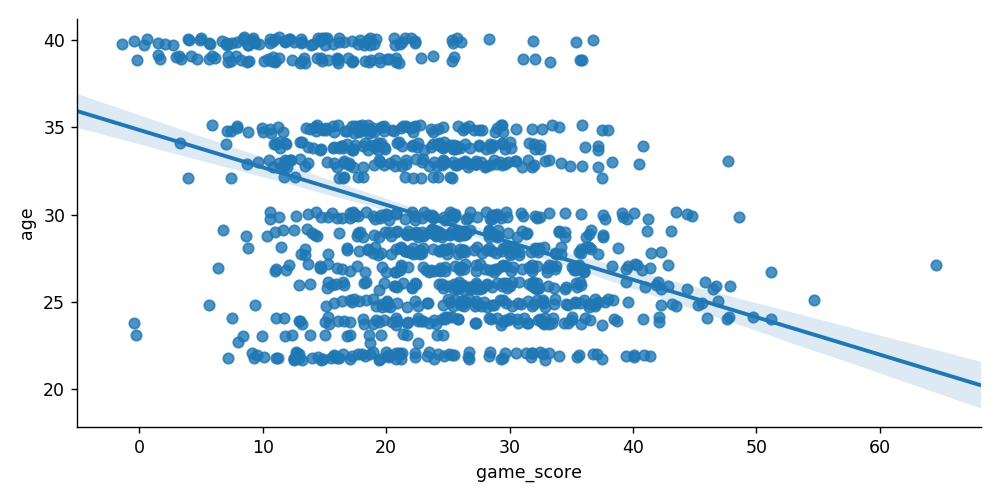

In [14]:
sns.lmplot("game_score", "age", data=jordan, size=4, aspect=2);

In [16]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

js = standarize(jordan)
ls = standarize(lebron)

<IPython.core.display.Javascript object>


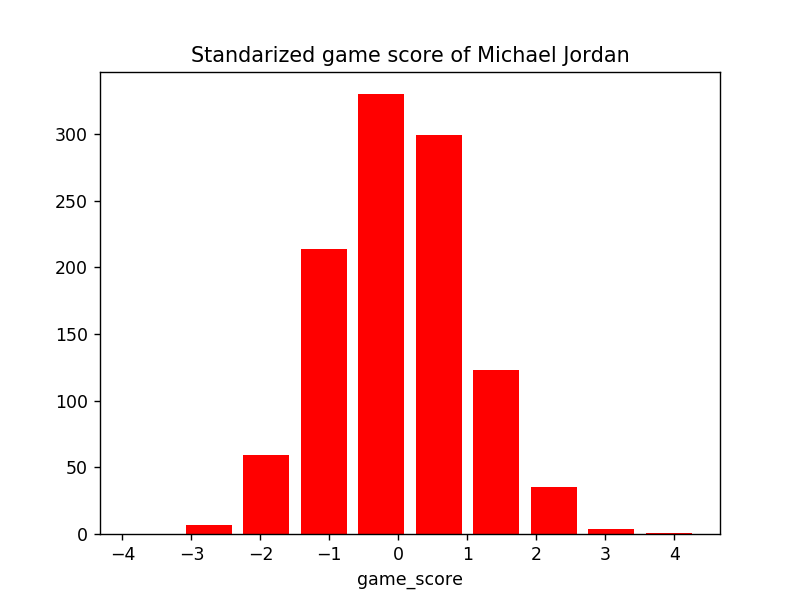

In [41]:
#js

"""
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
x = js.iloc[:,0:-1]
y = js.iloc[:,-1]
atribut1 = x.reshape(x.shape[0], 1)
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)"""

plt.figure()
plt.title("Standarized game score of Michael Jordan")
plt.xlabel("game_score")
obj = js["game_score"]
hist = plt.hist(obj, range=[-4, np.max(obj)], histtype="bar", rwidth=0.8, color = 'red')

<IPython.core.display.Javascript object>


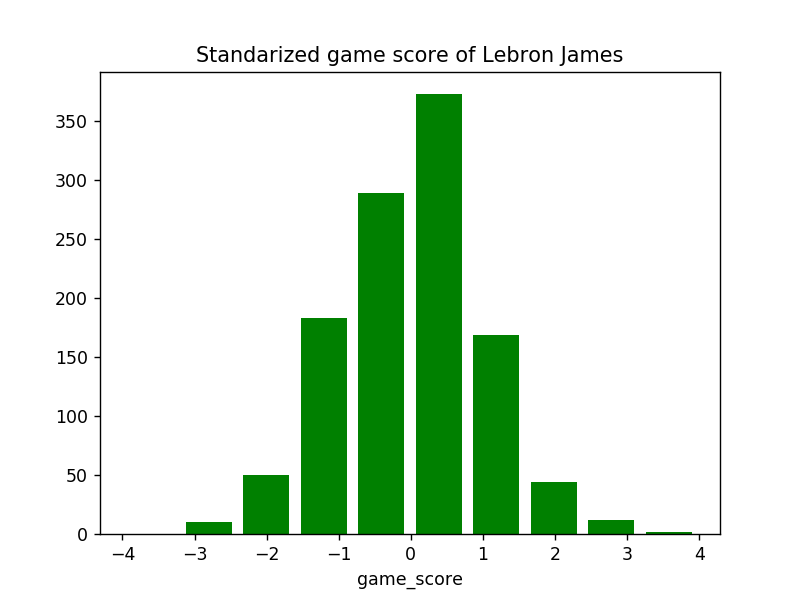

In [40]:
#ls

plt.figure()
plt.title("Standarized game score of Lebron James")
plt.xlabel("game_score")
obj = ls["game_score"]
hist = plt.hist(obj, range=[-4, np.max(obj)], histtype="bar", rwidth=0.8, color='green')